<a href="https://colab.research.google.com/github/kazemnejad/tensorflow-2-tutorial/blob/master/part_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 2.0 Tutorial: Part #2


Deep Learning Group, Iran University of Science and Technology,

*   Last Update: Dec 2019
*   Official Page: https://github.com/iust-deep-learning/tensorflow-2-tutorial





---




Please run the following cell before going through the rest of the tutorial.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
print(tf.__version__)

from pprint import pprint

TensorFlow 2.x selected.
2.1.0-rc1


## High-level APIs

---



### Exercise #1: Product Review Classifier
Suppose that we have an online store (e.g., Amazon), and users can put a comment on products if they have bought them. Then, we want to find 1) whether the user would like to recommend the product 2) the sentiment of that review. Your model is given the title, the body, and the category of the review.
Here are the details of inputs and outputs:

Inputs
-  Title: Vectorized & padded input (can consist of multiple word)
-  Body: Vectorized & padded review content
-  Product Category: one category out of 12 (one-hot representation)

Output
-  Sentiment score: 3 possibilities (bad, medium, good)
-  Recommend: Wether the user recommends the product



In [ ]:
num_categories = 12

title_input = tf.keras.Input(shape=(None,), dtype='int32') # Variable-length sequence of ints
body_input = tf.keras.Input(shape=(None,), dtype='int32') # Variable-length sequence of ints
cat_input = tf.keras.Input(shape=(num_categories,)) # One-hot representation (dtype=tf.float32)
emb = tf.keras.layers.Embedding(input_dim=5000,output_dim=128,mask_zero=True)
x1 = emb(title_input)
x2 = emb(body_input)




encoded_title = tf.keras.layers.LSTM(100)(x1) # 100-d representation
encoded_body = tf.keras.layers.LSTM(100)(x2) # 100-d representation

merge = tf.keras.layers.concatenate([encoded_title,encoded_body,cat_input])

output_sentiment = tf.keras.layers.Dense(3, activation='sigmoid')(merge) # Model prediction of sentiment
output_recom = tf.keras.layers.Dense(1, activation='relu')(merge) # Model prediction of the user's recommendation status

model = tf.keras.Model(inputs=[title_input,body_input,cat_input],outputs=[output_sentiment,output_recom]) # Final Model
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

NameError: ignored

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

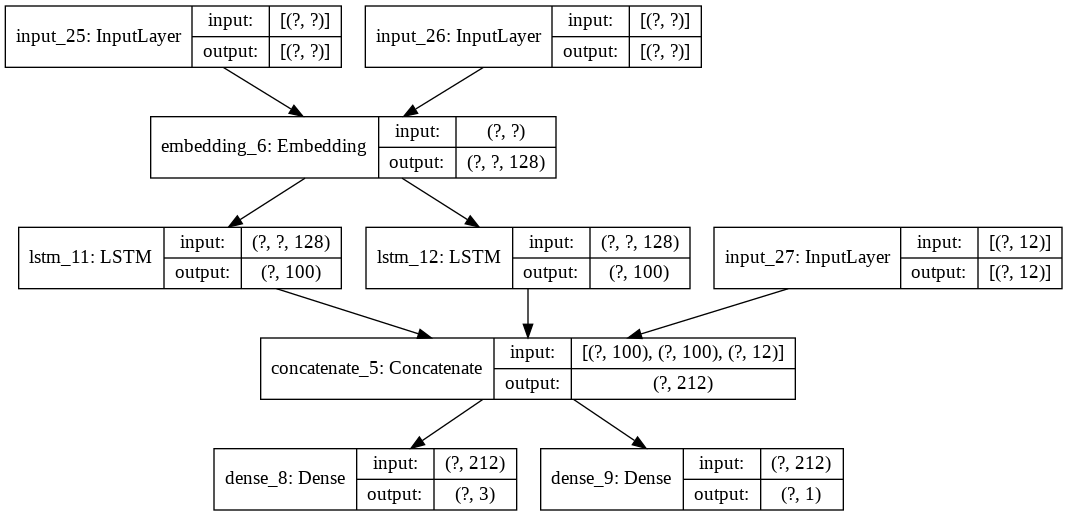

In [ ]:
# Check yours against the following plot

### Exercise #2: Simulate 10 throwings of one die and one coin.
Another technique that originates from Computer Vision is called Max pooling. As you might remember, this technique reduces the impact of spatial information in the image. For example, If your CNN says, "Yay! I found a wheel at the position (x,y).", your Max-pooling will convert this sentence to "Yay! I found a wheel in this image."  Intuitively We can use the max-pooling procedure in any configuration beside an image. Here is an example of Max-pooling application in recurrent networks:

<p align="center"><img src="https://iust-deep-learning.github.io/972/static_files/assignments/asg05_assets/05_rnn_max_pooling.png" width="450" />   
</p>
<p align="center">Max-pooling through an RNN's hidden states.  </p>

In this setup, we'd like to perform max-pooling over the hidden states $\hat{h} = MaxPool([h^{(1)}, ..., h^{(n)}])$ where $\hat{h}$ is the max-pooled version. Every dim of $\hat{h}$ is the maximum of that particular dim across all of the hidden states.

$$
\hat{h}_i =\max_{1\le k \le n} h^{(k)}_i
$$

Although the default Keras framework provides the implementation, it lacks the masking support. Implement this mechanism as a Keras layer.

In [ ]:
class MaskedGlobalMaxPooling1D(tf.keras.layers.Layer):
  def call(self, inputs, mask=None):
    """
    Args:
      inputs (Tensor(dtype=float32)): shape = [batch, timesteps, featurs]
      mask (Tensor(dtype=bool)): shape = [batch, timesteps]
      
    Returns
      output (Tensor(dtype=float32)): shape = [batch, features]
      
    Hint: tf.where, tf.tile, tf.math.reduce_max could be helpful.
    """
    output = None

    ########################################
    #     Put your implementation here     #
    ########################################
    
    return output

Test your implementation

In [ ]:
import numpy as np

seq = tf.constant( [ 
    [[1, 3],
     [4, -2],
     [0, 11]],
    
    [[9, -3],
     [8, -2],
     [100, -5]]
], dtype=tf.float32)
mask = tf.constant([
    [True, True, True],
    [True, True, False]
], dtype=tf.bool)

max_pooled = MaskedGlobalMaxPooling1D()(seq, mask=mask)

print(max_pooled)
assert np.all(max_pooled.numpy() == np.array([[ 4., 11.],
       [ 9., -2.]]))
print("Passed!")

## Final Assignment: Low-level MNIST CNN-Classifier

---



We have implemented an MNIST classifier several times. However, we want to implement a multi-layer CNN classifier using raw TensorFlow operations and matrix multiplication. No pre-defined CNN blocks are allowed. Moreover, you should organize your model using TF 2.0 Model sub-classing APIs (your assignment will be evaluated based on the cleanness and your effective usages of high-level Model APIs). Additionally, the only available training option is the TF’s GradientTape.

Assignments criteria:
* Matrix implementation of a convolutional layer.
* Model organization using TF 2.0 sub-classing API
* Model training using TF 2.0 GradientTape

*Hint: You may refer to [here](https://medium.com/@_init_/an-illustrated-explanation-of-performing-2d-convolutions-using-matrix-multiplications-1e8de8cd2544) to rewrite 2D Convolutions in terms of matrix multiplications.*

In [ ]:
# from tensorflow.keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# x_train, x_test = x_train / 255., x_test / 255.

# num_classes = 10

# lr = 0.001
# steps = 200
# batch_size = 128
# display_step = 10


# conv1_filters = 32
# conv2_filters = 64
# fc1_units = 1024


# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# def matrix2vec(input):
#     h, w = input.shape
#     output_vector = np.zeros(h*w, dtype=input.dtype)
#     input = np.flipud(input) 
#     for i,row in enumerate(input):
#         st = i*w
#         nd = st + w
#         output_vector[st:nd] = row   
#     return output_vector


# def vec2matrix(input, output_shape):
#     h, w = output_shape
#     output = np.zeros(output_shape, dtype=input.dtype)
#     for i in range(h):
#         st = i*w
#         nd = st + w
#         output[i, :] = input[st:nd]
#     output=np.flipud(output)
#     return output


# def conv_with_mul(I, F):
#     print(I.shape)
#     print(F.shape)
#     _,  I_row_num, I_col_num = I.shape
#     F_row_num, F_col_num, _, _ = F.shape

#     output_row_num = I_row_num + F_row_num - 1
#     output_col_num = I_col_num + F_col_num - 1

#     F_zero_padded = np.pad(F, ((output_row_num - F_row_num, 0),
#                                (0, output_col_num - F_col_num)),
#                             'constant', constant_values=0)

#     toeplitz_list = []
#     for i in range(F_zero_padded.shape[0]-1, -1, -1):
#         c = F_zero_padded[i, :]
#         r = np.r_[c[0], np.zeros(I_col_num-1)]
#         toeplitz_m = toeplitz(c,r)
#         toeplitz_list.append(toeplitz_m)

#     c = range(1, F_zero_padded.shape[0]+1)
#     r = np.r_[c[0], np.zeros(I_row_num-1, dtype=int)]
#     doubly_indices = toeplitz(c, r)

#     toeplitz_shape = toeplitz_list[0].shape
#     h = toeplitz_shape[0]*doubly_indices.shape[0]
#     w = toeplitz_shape[1]*doubly_indices.shape[1]
#     doubly_blocked_shape = [h, w]
#     doubly_blocked = np.zeros(doubly_blocked_shape)

#     b_h, b_w = toeplitz_shape
#     for i in range(doubly_indices.shape[0]):
#         for j in range(doubly_indices.shape[1]):
#             start_i = i * b_h
#             start_j = j * b_w
#             end_i = start_i + b_h
#             end_j = start_j + b_w
#             doubly_blocked[start_i: end_i, start_j:end_j] = toeplitz_list[doubly_indices[i,j]-1]

#     vectorized_I = matrix2vec(I)
    
#     result_vector = np.matmul(doubly_blocked, vectorized_I)

#     out_shape = [output_row_num, output_col_num]
#     output = vec2matrix(result_vector, out_shape)
#     return output



# def conv2d(x, W, b, strides=1):
#     x = conv_with_mul(x, W)
#     x = tf.nn.bias_add(x, b)
#     return tf.nn.relu(x)

# def maxpool2d(x, k=2):
#     return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')


# random_normal = tf.initializers.RandomNormal()

# weights = {
#     'w1': tf.Variable(random_normal([5, 5, 1, conv1_filters])),
#     'w2': tf.Variable(random_normal([5, 5, conv1_filters, conv2_filters])),
#     'w3': tf.Variable(random_normal([7*7*64, fc1_units])),
#     'out': tf.Variable(random_normal([fc1_units, num_classes]))
# }

# biases = {
#     'b1': tf.Variable(tf.zeros([conv1_filters])),
#     'b2': tf.Variable(tf.zeros([conv2_filters])),
#     'b3': tf.Variable(tf.zeros([fc1_units])),
#     'out': tf.Variable(tf.zeros([num_classes]))
# }


# def conv_net(x):
#     x = tf.reshape(x, [-1, 28, 28, 1])
#     conv1 = conv2d(x, weights['w1'], biases['b1'])
#     conv1 = maxpool2d(conv1, k=2)
#     conv2 = conv2d(conv1, weights['w2'], biases['b2'])
#     conv2 = maxpool2d(conv2, k=2)
#     fc1 = tf.reshape(conv2, [-1, weights['w1'].get_shape().as_list()[0]])
#     fc1 = tf.add(tf.matmul(fc1, weights['w1']), biases['b1'])
#     fc1 = tf.nn.relu(fc1)
#     out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
#     return tf.nn.softmax(out)

# def cross_entropy(y_pred, y_true):
#     y_true = tf.one_hot(y_true, depth=num_classes)
#     y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
#     return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# def accuracy(y_pred, y_true):
#     correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
#     return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# optimizer = tf.optimizers.Adam(lr)

# def run_optimization(x, y):
#     with tf.GradientTape() as g:
#         pred = conv_net(x)
#         loss = cross_entropy(pred, y)
#     trainable_variables = list(weights.values()) + list(biases.values())

#     gradients = g.gradient(loss, trainable_variables)
    
#     optimizer.apply_gradients(zip(gradients, trainable_variables))

# for step, (batch_x, batch_y) in enumerate(train_data.take(steps), 1):
#     run_optimization(batch_x, batch_y)
    
#     if step % display_step == 0:
#         pred = conv_net(batch_x)
#         loss = cross_entropy(pred, batch_y)
#         acc = accuracy(pred, batch_y)
#         print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

# pred = conv_net(x_test)
# print("Test Accuracy: %f" % accuracy(pred, y_test))



In [ ]:
import numpy as np
from scipy.linalg import toeplitz

class conv2d(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size):
        super(conv2d,self).__init__()
        self.filters = filters
        self.kernel_size = kernel_size

    def build(self, input_shape):
        # self.b = self.add_weight(shape=(self.filters),initializer='zeros', trainable=True)
        # self.w = tf.zeros(shape=(self.kernel_size))
        # for i in range(self.filters):
        #     self.w = tf.concat([self.w,self.add_weight(shape=(self.kernel_size), initializer='random_normal', trainable=True)],axis=0)
        # print(self.w.shape)
        self.w = tf.zeros(shape=(self.kernel_size))
        for i in range(self.filters):
            self.w = tf.concat([self.w, self.add_weight(shape=self.kernel_size, initializer='random_normal', trainable=True)], axis=0)
        self.w = self.w[self.kernel_size[0]:]
        # print(self.w)

    def call(self, input):
        def _convolution_with_mul(I, F):
            I_row_num, I_col_num = I.shape 
            F_row_num, F_col_num = F.shape
            output_row_num = I_row_num + F_row_num - 1
            output_col_num = I_col_num + F_col_num - 1
            F_zero_padded = tf.pad(F, ((output_row_num - F_row_num, 0),
                                    (0, output_col_num - F_col_num)),
                                    'constant', constant_values=0)
            toeplitz_list = []
            for i in range(F_zero_padded.shape[0]-1, -1, -1):
                c = F_zero_padded[i, :]
                r = np.r_[c[0], np.zeros(I_col_num-1)]
                toeplitz_m = toeplitz(c,r)
                toeplitz_list.append(toeplitz_m)
            c = range(1, F_zero_padded.shape[0]+1)
            r = np.r_[c[0], np.zeros(I_row_num-1, dtype=int)]
            doubly_indices = toeplitz(c, r)
            toeplitz_shape = toeplitz_list[0].shape 
            h = toeplitz_shape[0]*doubly_indices.shape[0]
            w = toeplitz_shape[1]*doubly_indices.shape[1]
            doubly_blocked_shape = [h, w]
            doubly_blocked = np.zeros(doubly_blocked_shape)
            b_h, b_w = toeplitz_shape 
            for i in range(doubly_indices.shape[0]):
                for j in range(doubly_indices.shape[1]):
                    start_i = i * b_h
                    start_j = j * b_w
                    end_i = start_i + b_h
                    end_j = start_j + b_w
                    doubly_blocked[start_i: end_i, start_j:end_j] = toeplitz_list[doubly_indices[i,j]-1]
            input_h, input_w = I.shape
            vectorized_I = np.zeros(input_h*input_w, dtype=np.float32)
            I = np.flipud(I) 
            for i,row in enumerate(I):
                st = i*input_w
                nd = st + input_w
                vectorized_I[st:nd] = row   
            result_vector = np.matmul(doubly_blocked, vectorized_I)
            out_shape = [output_row_num, output_col_num]
            output = np.zeros(out_shape, dtype=result_vector.dtype)
            for i in range(output_row_num):
                st = i*output_col_num
                nd = st + output_col_num
                output[i, :] = result_vector[st:nd]
            output=np.flipud(output)
            return output[1:-1,1:-1]
        # print(input.shape)
        res = []
        for i in range(self.filters):
            res.append(_convolution_with_mul(input, self.w))
        # print(tf.stack(res,axis=0).shape)
        
        
        return tf.stack(res,axis=0)[0]


class mnist_classifier(tf.keras.Model):
    def __init__(self):
        super(mnist_classifier, self).__init__()
        self.conv2d_1 = conv2d(filters=32, kernel_size=(3,3))
        self.conv2d_2 = conv2d(filters=64, kernel_size=(3,3))
        self.dense_1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense_2 = tf.keras.layers.Dense(10, activation='sigmoid')

    def call(self, inputs):
        x = self.conv2d_1(inputs)
        x = self.conv2d_2(x)
        x = tf.keras.backend.flatten(x)
        x = self.dense_1(x[None, :])
        x = self.dense_2(x[None, :])
        return x


In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras import backend as K

num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# print(y_train.shape)
model = mnist_classifier()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
mse_loss_fn = tf.keras.losses.MeanSquaredError()
loss_metric = tf.keras.metrics.Mean()

m = tf.keras.metrics.Accuracy()
for epoch in range(epochs):
  for i in range(1000):
    with tf.GradientTape() as tape:
      res = model(x_train[i])
      loss = mse_loss_fn(y_train[i], res)
      loss += sum(model.losses)
    #   m.update_state(y_train[i], res)
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    print("loss: ", loss_metric.result())
    # print("acc: ", m.result().numpy())

    # m.reset_states()

Using TensorFlow backend.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

loss:  tf.Tensor

KeyboardInterrupt: ignored

## References


---





*   Broadcasting in Python https://www.youtube.com/watch?v=tKcLaGdvabM
*   https://colab.research.google.com/notebooks/mlcc/creating_and_manipulating_tensors.ipynb#scrollTo=ocwT0iXH-nhT
*   https://tensorflow.org
*   http://web.stanford.edu/class/cs20si/

